# **Projeto Ponta a Ponta - Construindo um Modelo com Keras - Reuters Newswire Classification**

**Problema:** construir um modelo de Inteligência Artificial capaz de classificar notícias em diferentes categorias, utilizando o conjunto de dados Reuters Newswire, composto por textos noticiosos classificados em 46 categorias, abrangendo tópicos como economia, tecnologia, política, e outros.

**Não há mágica. Há matemática!** 🧙

In [143]:
# Importando o necessário
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import reuters

**Carregando os dados de Treino e Teste**

In [144]:
# Carregando o dataset de notícias da Reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [145]:
# Classes das notícias da Reuters
nomes_classes = [
    'cocoa', 'grain', 'crude', 'trade', 'interest', 'ship', 'wheat', 'corn',
    'money-fx', 'coffee', 'sugar', 'gold', 'oilseed', 'veg-oil', 'earn',
    'acq', 'alum', 'tin', 'strategic-metal', 'livestock', 'retail', 'ipi',
    'iron-steel', 'meal-feed', 'copra-cake', 'rubber', 'palm-oil', 'coconut',
    'palmkernel', 'naphtha', 'wool', 'reserves', 'shipyard', 'zinc',
    'copper', 'lead', 'tin-plate', 'strategic-stockpile', 'nat-gas', 'soybean',
    'soy-meal', 'soy-oil', 'sorghum', 'cotton', 'coconut-oil', 'coal', 'iron-ore'
]

**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as noticias.

In [146]:
# Decodificando uma notícia 
idx = 27
# Obtendo o dicionário de palavras
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[idx]])
print(decoded_newswire)
print('categoria: ' + nomes_classes[train_labels[idx]])


? a large dutch animal feed ? will begin formal legal proceedings early next month as a test case on the way the ec grain co responsibility levy is applied a spokesman for dutch grain and feed trade association het comite told reuters het comite has been co ? national actions against alleged distortions caused by currency factors in the levy and since december has ? more than 80 individual cases with the business appeal court in the hague the basic complaint is that the levy does not take account of currency cross rates of exchange and therefore ? in countries with strong currencies may have to pay more in their own currency than is paid to them by producers in another country het comite has obtained a temporary agreement that companies can pay the amount they receive toward the levy rather than paying a full guilder amount to the dutch grain commodity board the spokesman said het comite will provide financial and legal backing to the test case in the business administration court in t

In [147]:
# Vetorizando os dados
# O resultado é uma matriz com 10.000 colunas, onde cada coluna representa uma palavra do vocabulário (dicionário de palavras).
# Cada linha da matriz representa uma notícia.
# Cada linha é um vetor de 10.000 posições, onde cada posição é 1 se a palavra correspondente estiver presente na notícia, 
# e 0 se a palavra estiver ausente.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Cria uma matriz de zeros com dimensões [número de notícias, dimensão]
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # Para cada notícia, define 1 nas posições correspondentes às palavras presentes
    return results

# Vetorizando os dados de treino e teste para que as notícias sejam representadas como vetores binários
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [148]:
from tensorflow.keras.utils import to_categorical

# Vetorizando as classes
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

# Separando um conjunto de validação
numVal = 1000
# Dados de validação
X_val = X_train[:numVal]
Y_val = Y_train[:numVal]
X_train = X_train[numVal:]
Y_train = Y_train[numVal:]

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [149]:
# Cria o objeto de sequência de camadas 3 do Keras
ReutersModel = models.Sequential()
ReutersModel.add(layers.Input(shape=(10000,)))
ReutersModel.add(layers.Dense(64, activation='relu'))
ReutersModel.add(layers.Dense(64, activation='relu'))
ReutersModel.add(layers.Dense(46, activation='softmax'))

# Compila o modelo
ReutersModel.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# rmsprop é um otimizador que ajusta a taxa de aprendizado automaticamente durante o treinamento 
# categorical_crossentropy é a função de perda que é usada para classes categóricas
# accuracy é a métrica que queremos

**Treinamento do modelo**

In [150]:
# Treinar o modelo usando os dados de treino (X_train e Y_train)
resultado = ReutersModel.fit(X_train, Y_train, epochs=8, batch_size=512, validation_data=(X_val, Y_val))
# epochs é o número de épocas que queremos treinar
# batch_size é o número de amostras que usamos para calcular o gradiente
# validation_data é a tupla de dados de validação


# resultado_dict contém as métricas de treinamento e validação
resultado_dict = resultado.history

# Salvando o modelo treinado
ReutersModel.save('C:/Users/quint/Projetos/lia1_2024_2/Entregas - Diogo de Paula Quintão/Reuters/modelo.h5')

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3741 - loss: 3.2011 - val_accuracy: 0.6270 - val_loss: 1.8844
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6617 - loss: 1.6707 - val_accuracy: 0.6900 - val_loss: 1.4018
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7334 - loss: 1.1945 - val_accuracy: 0.7390 - val_loss: 1.2212
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7871 - loss: 0.9975 - val_accuracy: 0.7630 - val_loss: 1.1086
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8282 - loss: 0.8152 - val_accuracy: 0.7850 - val_loss: 1.0320
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8565 - loss: 0.6924 - val_accuracy: 0.8030 - val_loss: 0.9804
Epoch 7/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8833 - loss: 0.5691 - val_accuracy: 0.8030 - val_loss: 0.9376
Epoch 8/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8964 - loss: 0.5046 - val_accuracy: 0.8080 - val_loss:

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

Gráfico do modelo

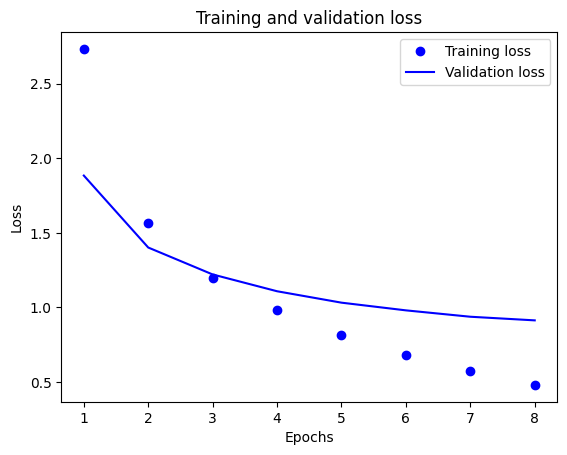

In [151]:
# Plotando o gráfico de perda
training_loss = resultado_dict['loss']
validation_loss = resultado_dict['val_loss']
trainging_accuracy = resultado_dict['accuracy']
validation_accuracy = resultado_dict['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Gráfico de perda
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

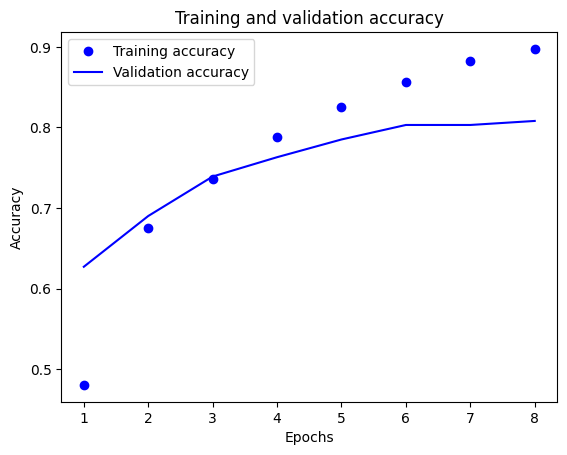

In [152]:
# Gráfico de acurácia
plt.plot(epochs, trainging_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')    
plt.ylabel('Accuracy')  
plt.legend()
plt.show()

In [153]:
# Avaliar o desempenho do modelo nos dados de teste
# Isso retornará a perda e a precisão do modelo no conjunto de dados de teste
loss, accuracy = ReutersModel.evaluate(X_test, Y_test)
print('Test accuracy:', accuracy)
print('Test loss:', loss)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7829 - loss: 0.9420
Test accuracy: 0.7729296684265137
Test loss: 0.9690940380096436


**Teste do modelo**

In [154]:
# Fazer previsões no conjunto de dados de teste
predictions = ReutersModel.predict(X_test)
# As previsões retornam uma probabilidade para cada classe, então pegamos a classe com maior probabilidade
predicted_classes = np.argmax(predictions, axis=1)

# Exibir as previsões para as primeiras 10 notícias de teste
# np.argmax(Y_test[i]) é a classe verdadeira, enquanto predicted_classes[i] é a classe prevista
for i in range(10):
    print(f'Notícia {i+1}:')
    print(f'Classe verdadeira: {np.argmax(Y_test[i])}')
    print(f'Classe prevista: {predicted_classes[i]}')
    print()

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Notícia 1:
Classe verdadeira: 3
Classe prevista: 3

Notícia 2:
Classe verdadeira: 10
Classe prevista: 10

Notícia 3:
Classe verdadeira: 1
Classe prevista: 1

Notícia 4:
Classe verdadeira: 4
Classe prevista: 4

Notícia 5:
Classe verdadeira: 4
Classe prevista: 13

Notícia 6:
Classe verdadeira: 3
Classe prevista: 3

Notícia 7:
Classe verdadeira: 3
Classe prevista: 3

Notícia 8:
Classe verdadeira: 3
Classe prevista: 3

Notícia 9:
Classe verdadeira: 3
Classe prevista: 3

Notícia 10:
Classe verdadeira: 3
Classe prevista: 3

